In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords


In [16]:
df_metadata = pd.read_csv('gutenberg_with_text.csv')

In [17]:
def get_book_paragraphs(book:str):
    paragraphs = book.split('\n\n')
    return paragraphs

In [18]:
#for each author, get mean paragraph length
authors = []
mean_paragraph_lengths = []
num_paragraphs = []
normalized_num_paragraphs = []
for index, row in df_metadata.iterrows():
    authors.append(row['Authors'])
    paragraphs = get_book_paragraphs(row['Books'])
    num_paragraphs.append(len(paragraphs))
    mean_paragraph_lengths.append(np.mean([len(paragraph) for paragraph in paragraphs]))
    normalized_num_paragraphs.append(len(paragraphs)/len(row['Books']))
#sort by mean paragraph length
df_paragraphs = pd.DataFrame({'Author': authors, 'Mean Paragraph Length': mean_paragraph_lengths, 'Number of Paragraphs': num_paragraphs, 'Normalized Number of Paragraphs': normalized_num_paragraphs})
df_paragraphs
   

,Author,Mean Paragraph Length,Number of Paragraphs,Normalized Number of Paragraphs
0,"Alcott, Louisa May",283.567839,199,0.003502
1,"Austen, Jane",359.908738,515,0.002763
2,"Balzac, Honoré de",106.373571,1574,0.009227
3,"Barrie, J. M. (James Matthew)",377.647059,221,0.002634
4,"Baum, L. Frank (Lyman Frank)",160.096558,2092,0.006169
...,...,...,...,...
71,"Wells, H. G. (Herbert George)",696.395722,187,0.001432
72,"Wharton, Edith",272.339130,230,0.003645
73,"Widger, David",358.983333,360,0.002770
74,"Wilde, Oscar",254.133065,248,0.003904


[Text(0, 0.5, '')]

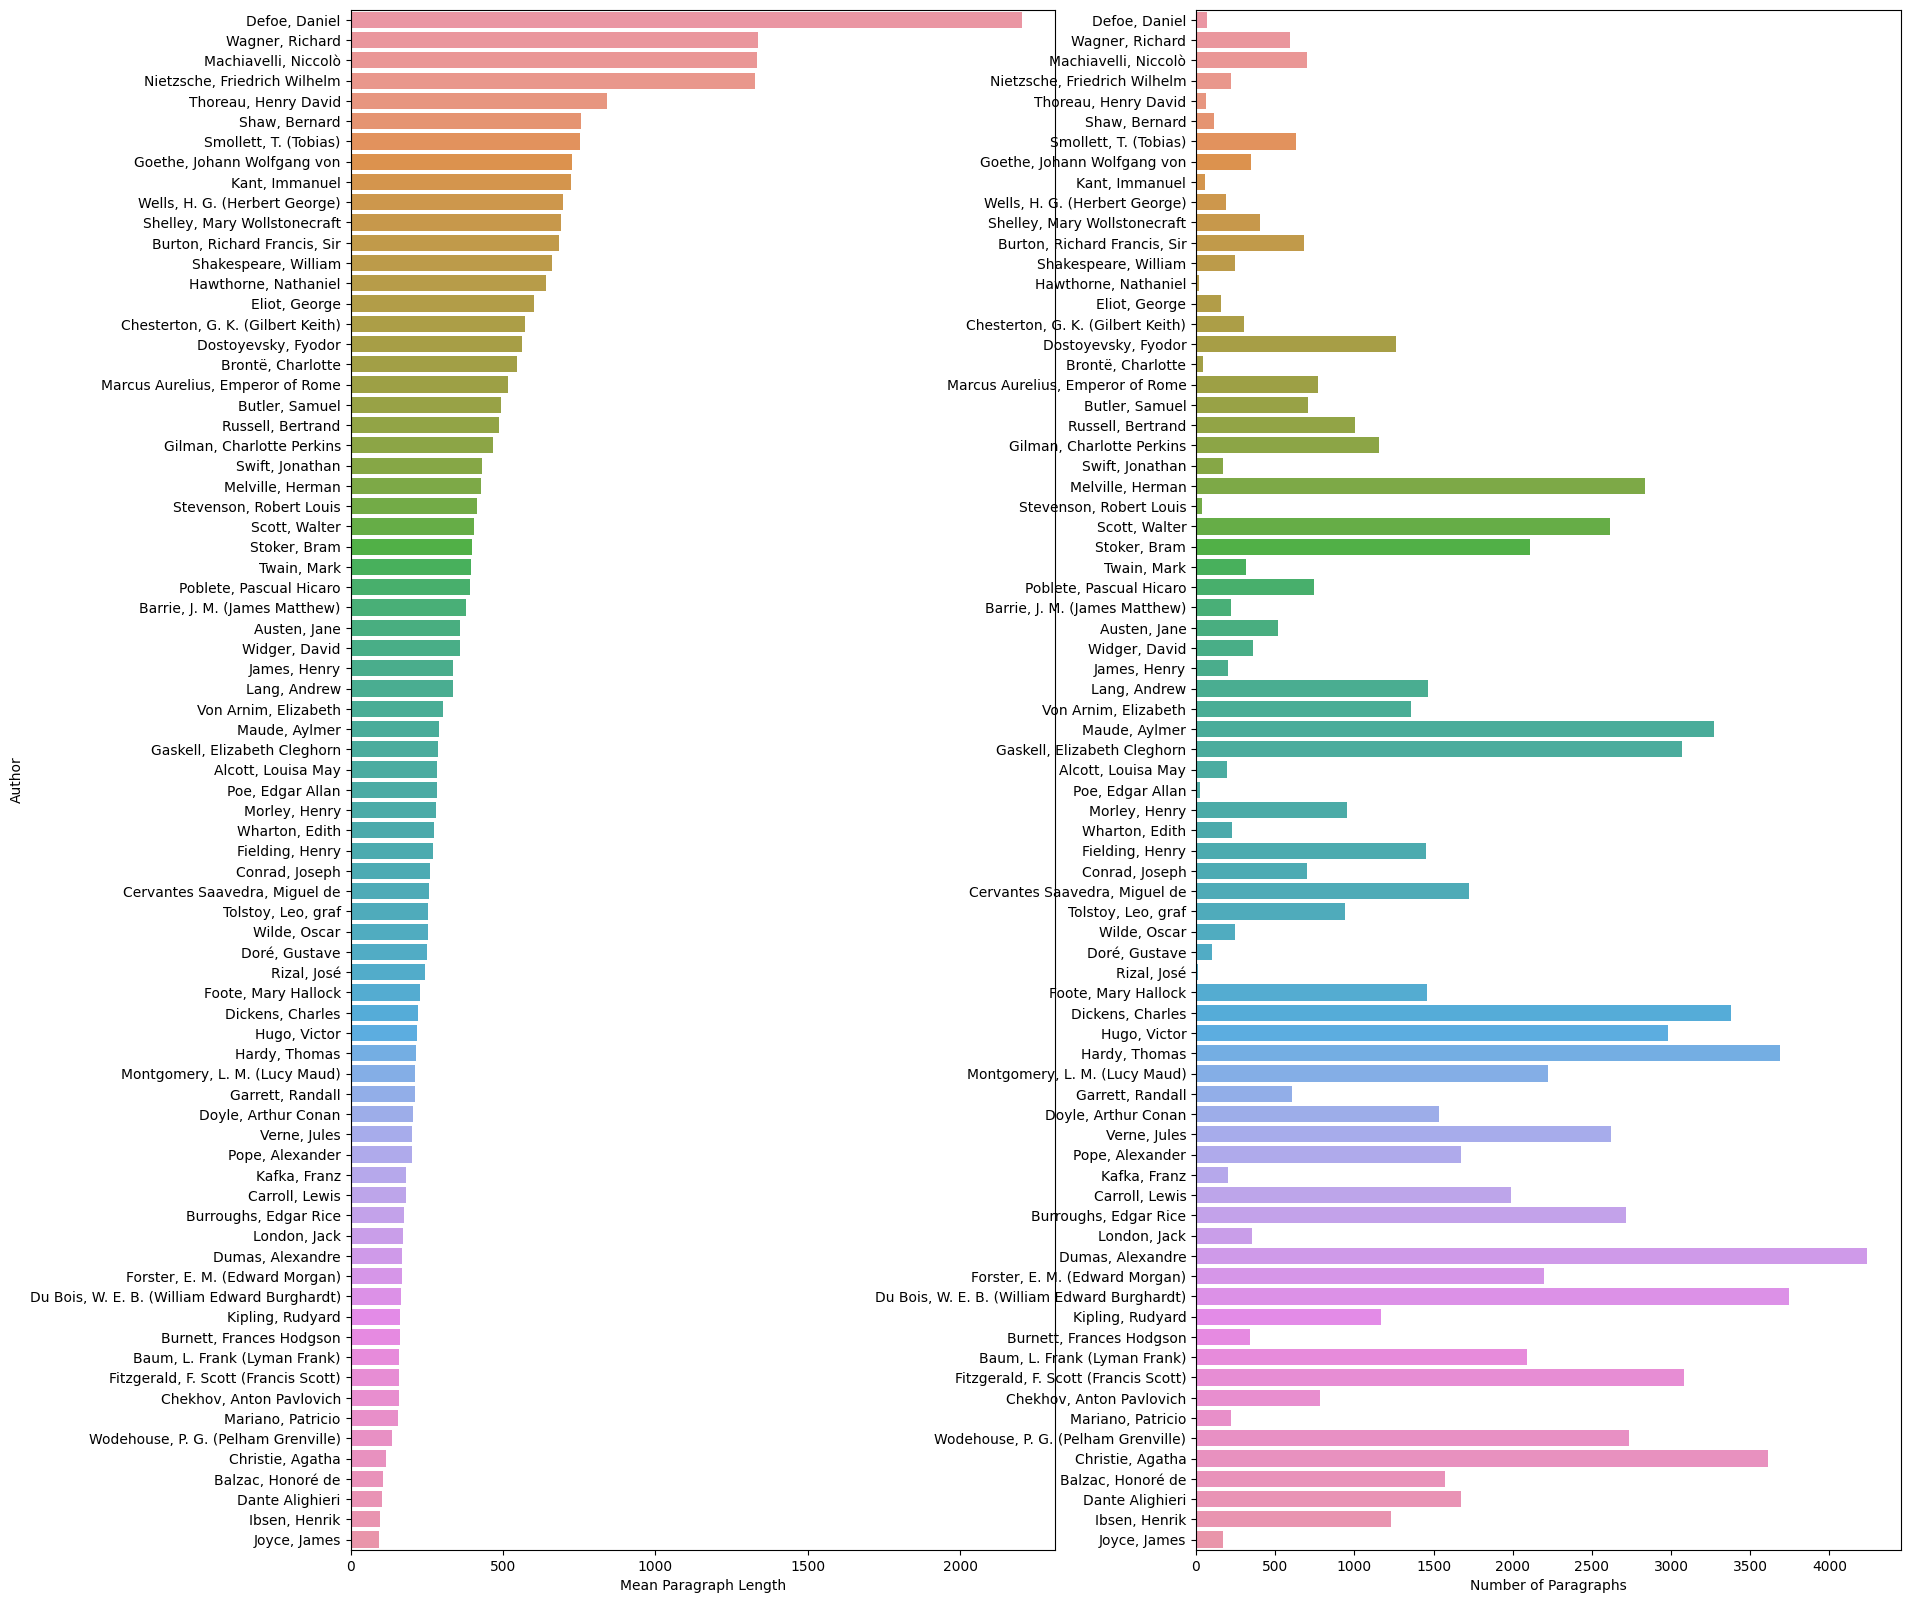

In [19]:
#plot sorted mean paragraph length vs author
df_paragraphs = df_paragraphs.sort_values(by=['Mean Paragraph Length'], ascending=False)

#plot with seaborn without authors
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
ax = sns.barplot(x="Mean Paragraph Length", y="Author", data=df_paragraphs)
plt.subplot(1,2,2)
#sns remove y label
ax = sns.barplot(x="Number of Paragraphs", y="Author", data=df_paragraphs)
ax.set(ylabel=None)

[Text(0, 0.5, '')]

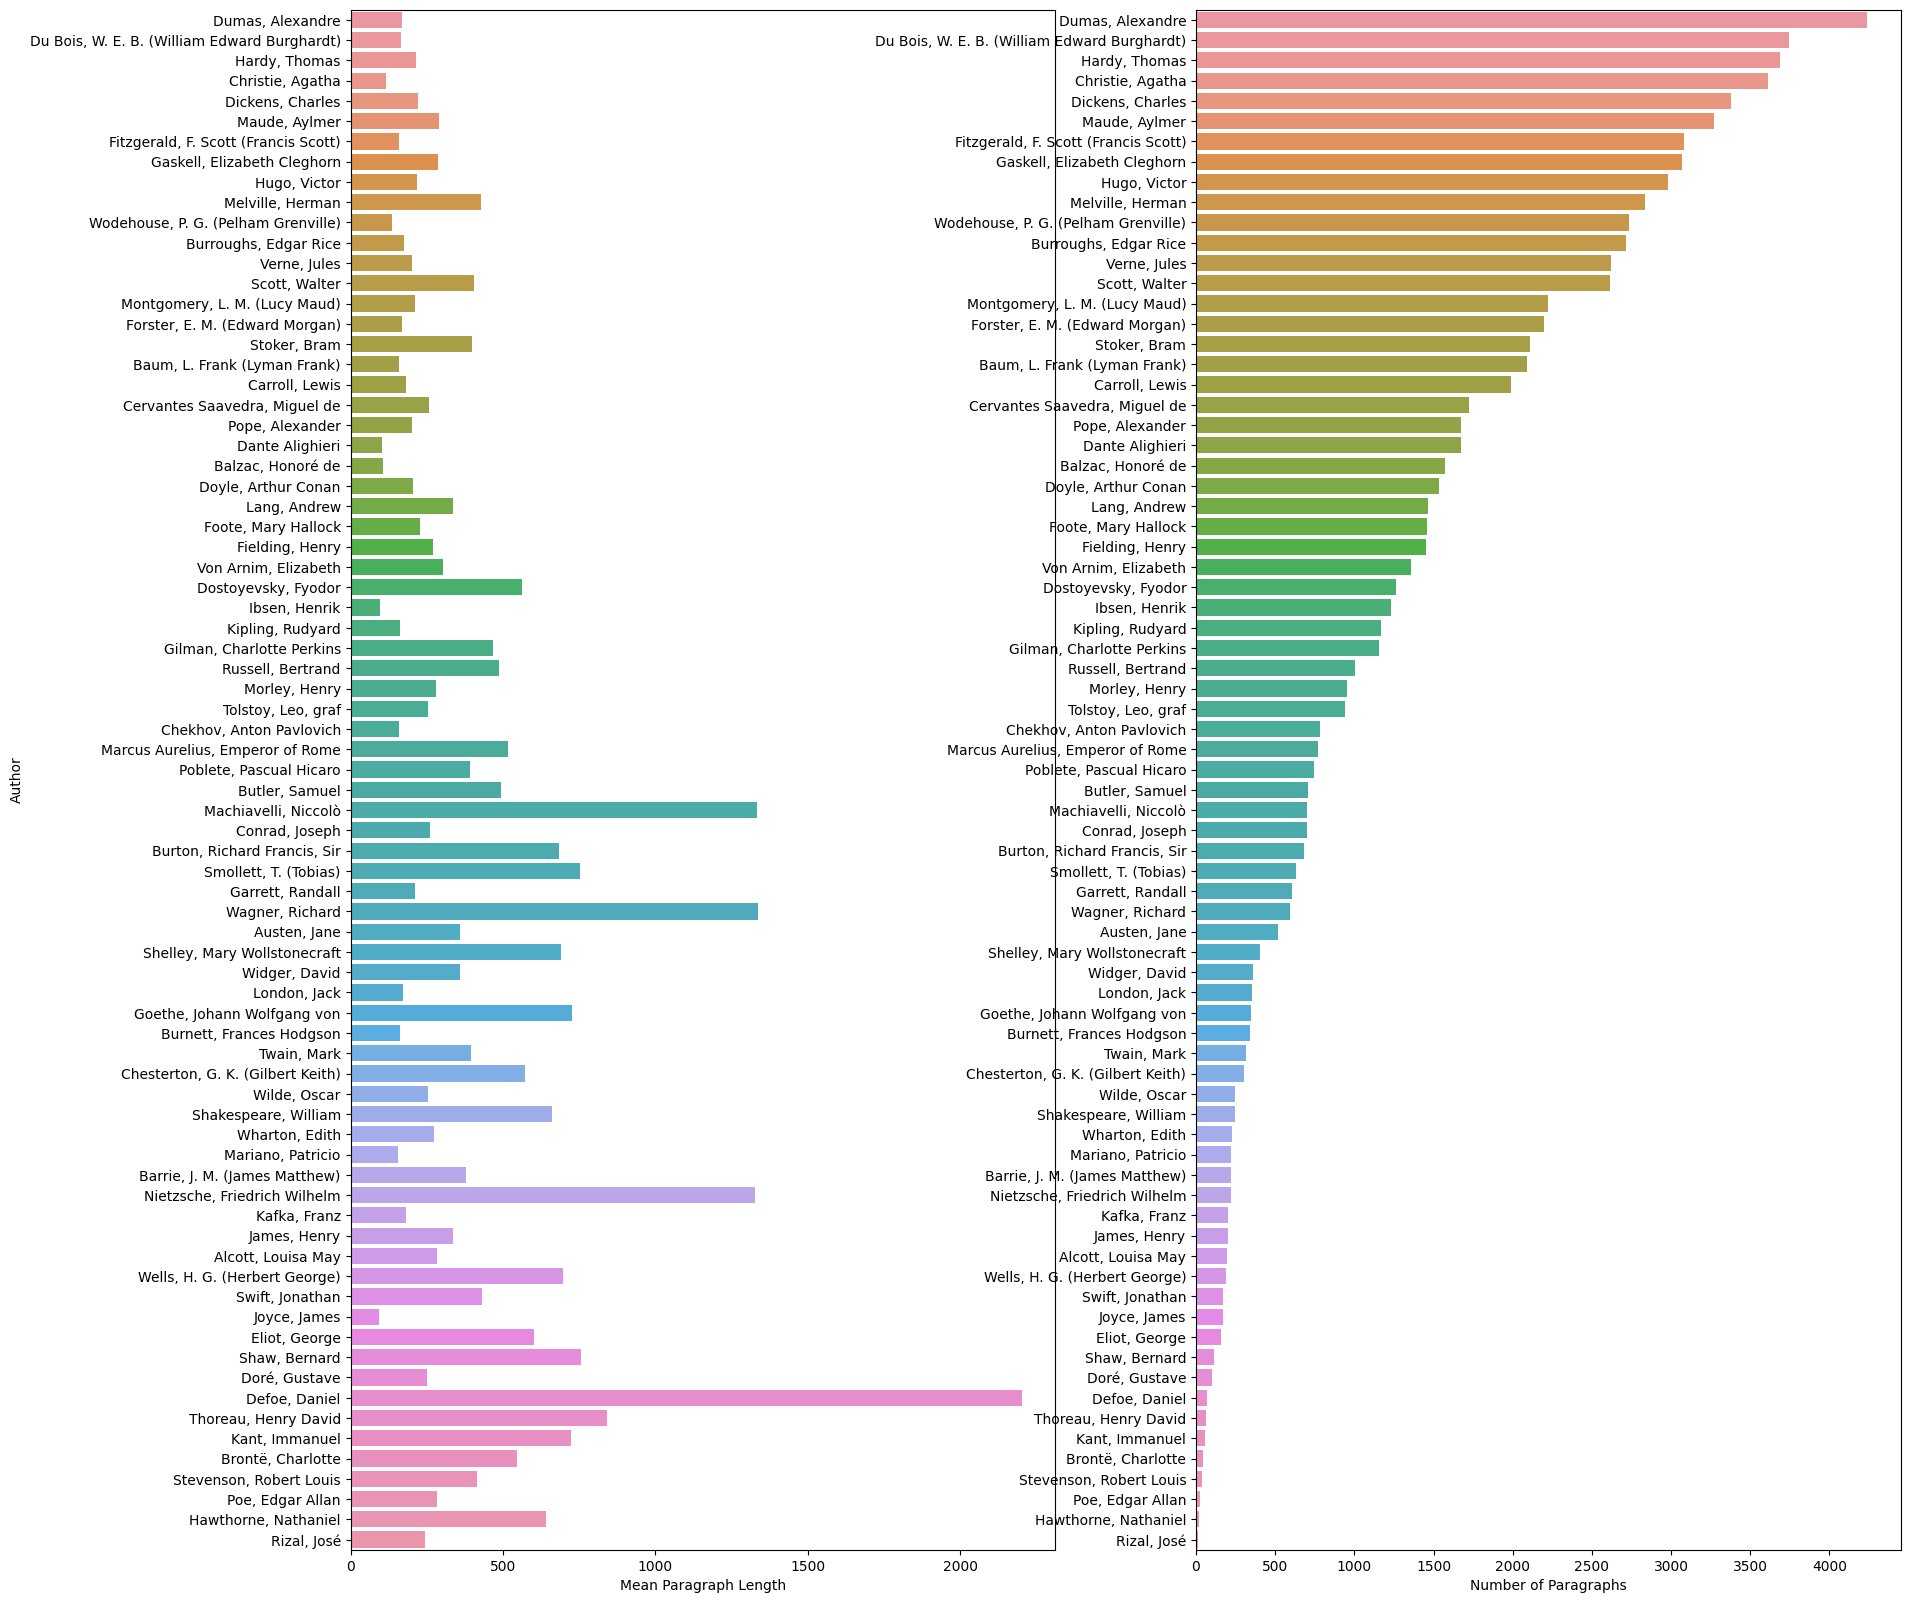

In [20]:
#plot sorted number of paragraph length vs author
df_paragraphs = df_paragraphs.sort_values(by=['Number of Paragraphs'], ascending=False)

#plot with seaborn without authors
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
ax = sns.barplot(x="Mean Paragraph Length", y="Author", data=df_paragraphs)
plt.subplot(1,2,2)
#sns remove y label
ax = sns.barplot(x="Number of Paragraphs", y="Author", data=df_paragraphs)
ax.set(ylabel=None)

[Text(0, 0.5, '')]

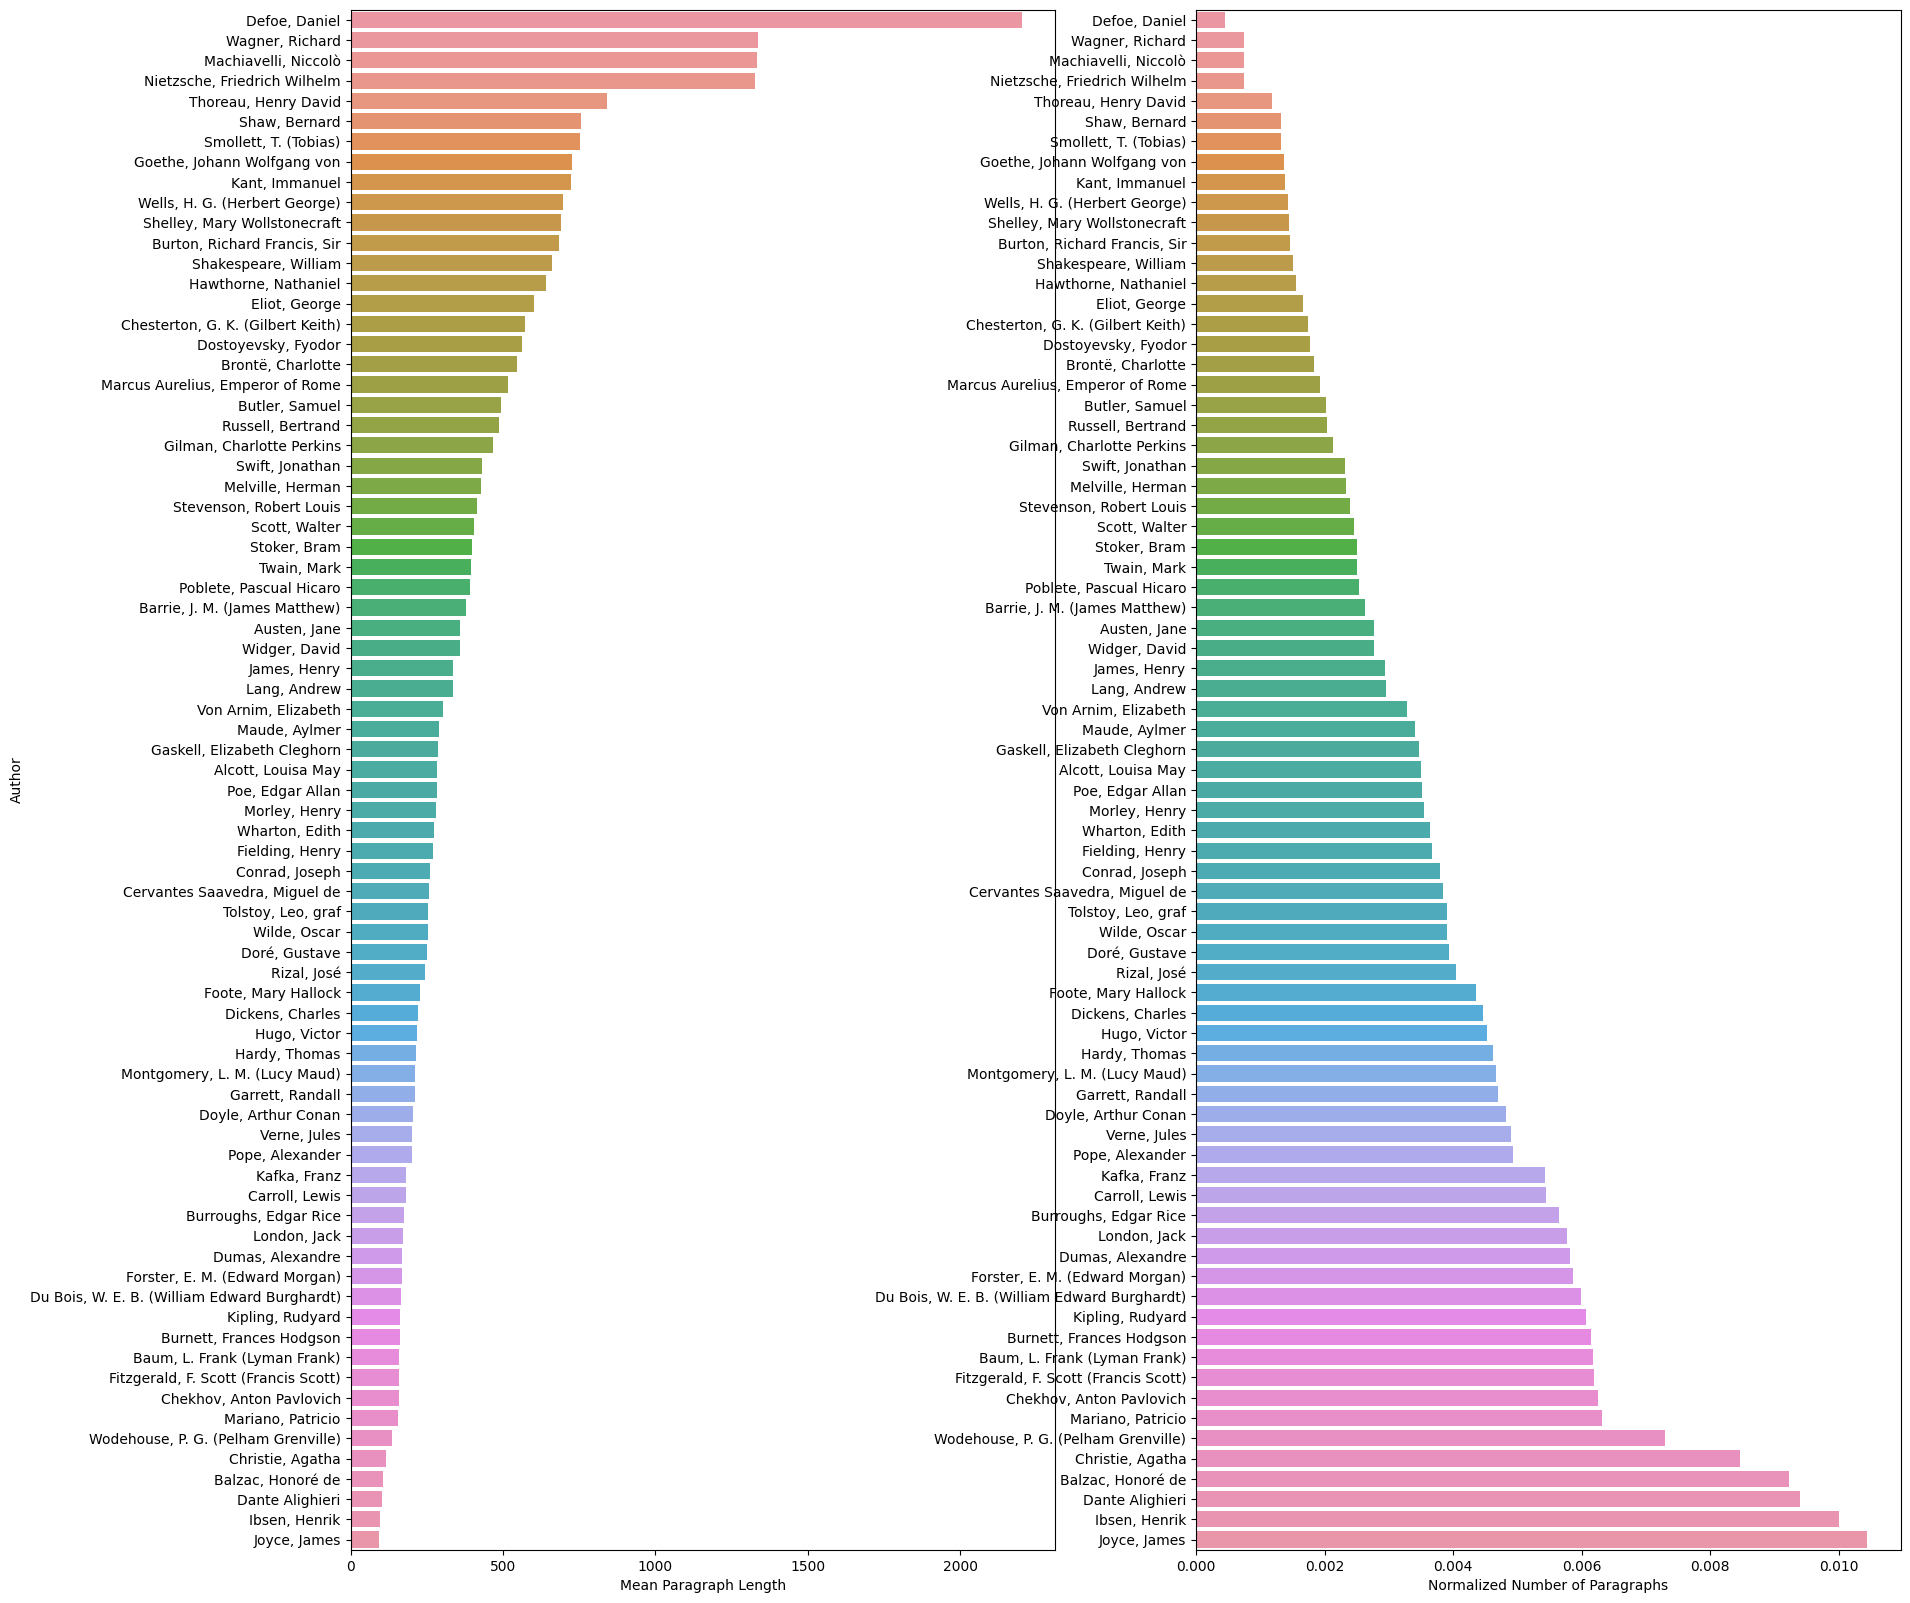

In [21]:
#plot sorted mean paragraph length vs author
df_paragraphs = df_paragraphs.sort_values(by=['Mean Paragraph Length'], ascending=False)

#plot with seaborn without authors
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
ax = sns.barplot(x="Mean Paragraph Length", y="Author", data=df_paragraphs)
plt.subplot(1,2,2)
#sns remove y label
ax = sns.barplot(x="Normalized Number of Paragraphs", y="Author", data=df_paragraphs)
ax.set(ylabel=None)

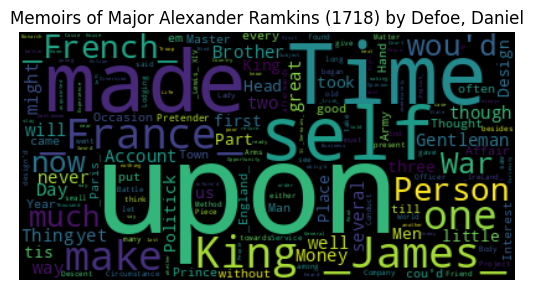

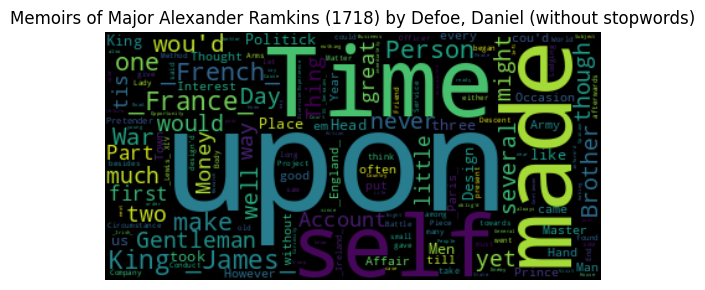

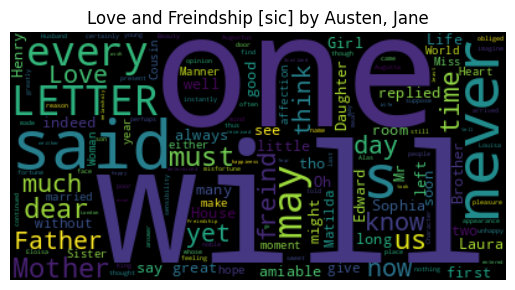

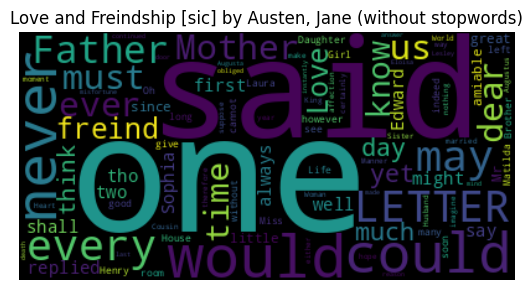

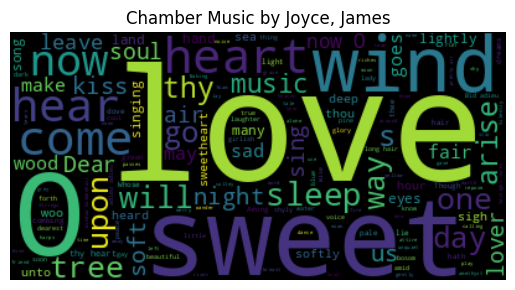

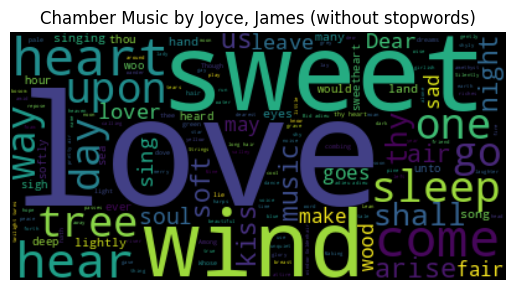

In [36]:
selected_authors = ['Defoe, Daniel', 'Austen, Jane', 'Joyce, James']

_stopwords = set(stopwords.words('english')) 


# for each author plot word cloud
for author in selected_authors:
    text = df_metadata[df_metadata['Authors'] == author]['Books'].values[0]
    book = df_metadata[df_metadata['Authors'] == author]['Title'].values[0]
    wordcloud = WordCloud().generate(text)
    plt.figure(figsize=(10,10))
    plt.title(book + " by " + author)
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('wordclouds_' + author + '.png')
    plt.show()

    plt.figure(figsize=(10,10))
    plt.title(book + " by " + author + " (without stopwords)")

    wordcloud = WordCloud(stopwords=_stopwords).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('wordclouds_' + author + '_without_stopwords.png')
    plt.show()


In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
selected_authors = ['Defoe, Daniel', 'Austen, Jane', 'Joyce, James']

for author in selected_authors:
    text = df_metadata[df_metadata['Authors'] == author]['Books'].values[0]
    book = df_metadata[df_metadata['Authors'] == author]['Title'].values[0]
    tfidf = TfidfVectorizer(ngram_range=(1,1), max_df=1, min_df=0, max_features=None, analyzer='word', stop_words="english")
    paragraphs = get_book_paragraphs(text)
    TNG_tfidf = tfidf.fit_transform(paragraphs)
    feature_names = tfidf.get_feature_names_out()
    #get average tf-idf score for each word
    average_tfidf = np.mean(TNG_tfidf, axis=0)
    df = pd.DataFrame(average_tfidf.T, index=feature_names, columns=["TF-IDF"])
    #df = pd.DataFrame(TNG_tfidf[35].T.todense(), index=feature_names, columns=["TF-IDF"])
    df = df.sort_values(by='TF-IDF', ascending=False)
    print(df.head(10))

                TF-IDF
_finis_       0.014085
publisher     0.014085
ramkins_      0.009959
majr          0.009959
shop          0.008478
_provincial_  0.008218
bailiff       0.007191
exhibiting    0.007042
comprehend    0.007042
laudable      0.007042
               TF-IDF
105          0.001942
pistolletta  0.001942
argue        0.001942
quickly      0.001942
postilions   0.001942
begged       0.001942
pleases      0.001942
plainer      0.001942
perfidy      0.001942
candles      0.001942
              TF-IDF
quiet       0.005814
held        0.005814
graciously  0.005814
cover       0.005814
chamber     0.005814
dishonour   0.005814
sidew       0.005814
merrier     0.005814
rude        0.005814
room        0.005814
